In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import squidpy as sq
from scipy.cluster import hierarchy as sch
from matplotlib import pyplot as plt
from copy import deepcopy
%matplotlib inline

In [2]:
import scanpy as sc
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path

sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.5 python-igraph==0.10.4 pynndescent==0.5.8


In [10]:
vizgen_dir = Path().resolve() /'home'/'jupyter'/'region_1'
adata = sq.read.vizgen(
    path='/home/jupyter/region_1',
    counts_file="cell_by_gene.csv",
    meta_file="cell_metadata.csv",
    #transformation_file="micron_to_mosaic_pixel_transform.csv",
)

In [13]:
ser_exp = adata.to_df().sum(axis=1)
adata.obs['ExpressionCounts'] = ser_exp

<AxesSubplot:xlabel='ExpressionCounts', ylabel='Count'>

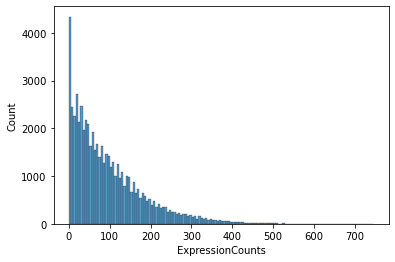

In [15]:
#fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(
    adata.obs["ExpressionCounts"],
   # log_scale=10,
    #kde=False,
    #ax=axs[0],
)
#g.set(xlim=(0, 500))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


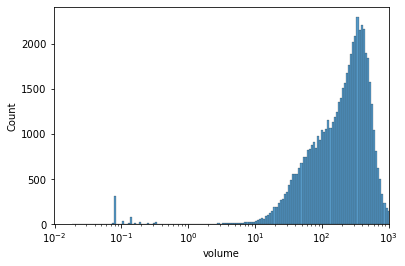

In [12]:
g=sns.histplot(
    adata.obs["volume"],
    log_scale = 10,
    #kde=False,
    #bins=60,
    #ax=axs[2],
)
g.set(xlim=(0, 1000))
plt.savefig('region1_qc.pdf', format='pdf')

In [7]:
adata

AnnData object with n_obs × n_vars = 58969 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
sc.pp.filter_cells(adata, min_counts=10)
#sc.pp.filter_genes(adata, min_cells=10)

In [10]:
adata.layers["counts"] = adata.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=4000)
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

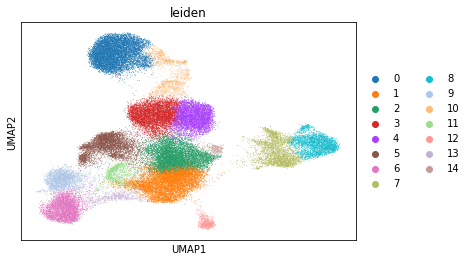

In [11]:
sc.pl.umap(
    adata,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

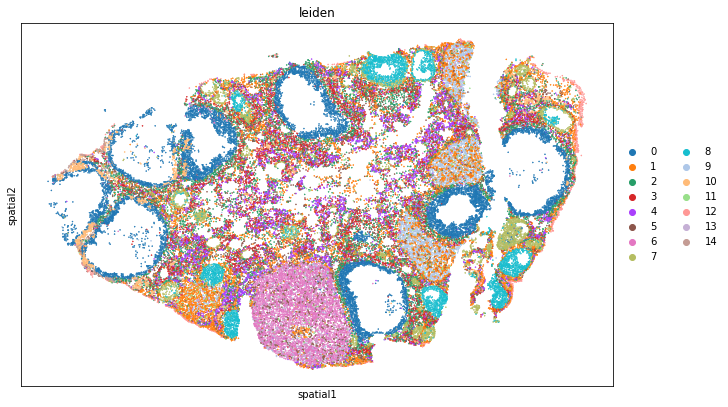

In [11]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    size=0.5,
    library_id='spatial',
    figsize=(10, 10)
)
plt.savefig('region1_all.pdf', format='pdf')

In [51]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>

In [54]:
plt.savefig('region1_all.pdf', format='pdf')

<Figure size 432x288 with 0 Axes>

In [13]:
df_ref_panel_ini = pd.read_excel('/home/jupyter/Marker_Region0.xlsx', index_col=0)

In [14]:
#df_ref_panel = df_ref_panel_ini.iloc[1:,2]
df_ref_panel = df_ref_panel_ini[df_ref_panel_ini.iloc[:, 2].notnull()]
df_ref_panel

Source Mouse Specific?   \
Gene                                                                          
Aldh1a1  gerton ; Richards ; ruptured/unruptured, post hCG              NaN   
Amh                                   GC_markers_YYcurated              NaN   
Amhr2                                 GC_markers_YYcurated              NaN   
Apoe                                 gerton / PNAS / Britt              NaN   
Bhmt                                        gerton dataset              NaN   
Ccl5                                 gerton / PNAS / Britt              NaN   
Cd14                                 gerton / PNAS / Britt              NaN   
Cd74                                 gerton / PNAS / Britt              NaN   
Cldn5                     gerrton dataset and PNAS dataset              NaN   
Col1a1                                       PNAS dataset               NaN   
Col1a2        PNAS dataset ; ruptured/unruptured, post hCG              NaN   
Col3a1   PNAS dataset ; ruptured/unruptured, no hCG ; r...              NaN   
Cyp17a1                                      Richards_Data              NaN   
Dcn                                          PNAS dataset               NaN   
Egfl7                     gerrton dataset and PNAS dataset              NaN   
Epcam                      gerton / Britt ; gerton dataset              NaN   
Fdx1                                                gerton              NaN   
Folr1                                               gerton              NaN   
Foxl2    GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Fst      GC_markers_Yycurated ; ruptured/unruptured, po...              NaN   
Gm2a                                                gerton              NaN   
H2-Aa                                gerton / PNAS / Britt              NaN   
H2-Ab1                               gerton / PNAS / Britt              NaN   
Hao2                                                gerton              NaN   
Hmgcs2                                GC_markers_YYcurated              NaN   
Idh1                                                gerton              NaN   
Inha     GC_markers_Yycurated ; ruptured/unruptured, no...              NaN   
Krt18                                       gerton / Britt              NaN   
Krt19                GC_markers_Yycurated ; gerton / Britt              NaN   
Krt7                                        gerton / Britt              NaN   
Ly6e                                        gerton / Britt              NaN   
Mgarp                                               gerton              NaN   
Pecamp1                                     gerton dataset              Yes   
Prlr                                                gerton              NaN   
Rspo1                                 GC_markers_YYcurated              NaN   
S100a9                                       PNAS dataset               NaN   
Spp1                            gerton dataset; Jiyang_8hr              NaN   
Upk3b                                 GC_markers_YYcurated              NaN   
Vim                                         gerton dataset              NaN   

                      NOTES                                Gene Description  \
Gene                                                                          
Aldh1a1               theca                                             NaN   
Amh                GC_Small                          anti-Mullerian hormone   
Amhr2                    GC          anti-Mullerian hormone receptor type 2   
Apoe     immune: macs/monos                                             NaN   
Bhmt                luteal                                              NaN   
Ccl5     immune: macs/monos                                             NaN   
Cd14     immune: macs/monos                                             NaN   
Cd74     immune: macs/monos                                             NaN   
Cldn5           endoth

In [15]:
marker_genes = df_ref_panel.index.tolist()
meta_gene = deepcopy(adata.var)
common_marker_genes = list(set(meta_gene.index.tolist()).intersection(marker_genes))
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']
meta_gene['Markers'] = meta_gene['Markers'].apply(lambda x: 'N.A.' if 'marker' not in str(x) else x)
meta_gene['Markers'].value_counts()

N.A.    228
Name: Markers, dtype: int64

In [16]:
ser_counts = adata.obs['leiden'].value_counts()
ser_counts.name = 'cell counts'
meta_leiden = pd.DataFrame(ser_counts)

cat_name = 'leiden'
sig_leiden = pd.DataFrame(columns=adata.var_names, index=adata.obs[cat_name].cat.categories)
for clust in adata.obs[cat_name].cat.categories:
    sig_leiden.loc[clust] = adata[adata.obs[cat_name].isin([clust]),:].X.mean(0)
sig_leiden = sig_leiden.transpose()
leiden_clusters = ['Leiden-' + str(x) for x in sig_leiden.columns.tolist()]
sig_leiden.columns = leiden_clusters
meta_leiden.index = sig_leiden.columns.tolist()
meta_leiden['leiden'] = pd.Series(meta_leiden.index.tolist(), index=meta_leiden.index.tolist())

In [17]:
meta_leiden

cell counts     leiden
Leiden-0          7991   Leiden-0
Leiden-1          7566   Leiden-1
Leiden-2          6682   Leiden-2
Leiden-3          5292   Leiden-3
Leiden-4          4674   Leiden-4
Leiden-5          4263   Leiden-5
Leiden-6          3823   Leiden-6
Leiden-7          3031   Leiden-7
Leiden-8          2962   Leiden-8
Leiden-9          2413   Leiden-9
Leiden-10         1506  Leiden-10
Leiden-11         1173  Leiden-11
Leiden-12          639  Leiden-12
Leiden-13          632  Leiden-13
Leiden-14          348  Leiden-14

In [14]:
adata

AnnData object with n_obs × n_vars = 52995 × 228
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'ExpressionCounts', 'n_counts', 'leiden'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'spatial', 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [18]:
meta_gene = pd.DataFrame(index=sig_leiden.index.tolist())
meta_gene['info'] = pd.Series('', index=meta_gene.index.tolist())
meta_gene['Markers'] = pd.Series('N.A.', index=sig_leiden.index.tolist())
meta_gene.loc[common_marker_genes, 'Markers'] = df_ref_panel.loc[common_marker_genes, 'NOTES']

meta_leiden['Cell_Type'] = pd.Series('N.A.', index=meta_leiden.index.tolist())
num_top_genes = 10
for inst_cluster in sig_leiden.columns.tolist():
  top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]

  inst_ser = meta_gene.loc[top_genes, 'Markers']
  inst_ser = inst_ser[inst_ser != 'N.A.']
  ser_counts = inst_ser.value_counts()

  max_count = ser_counts.max()

  max_cat = '_'.join(sorted(ser_counts[ser_counts == max_count].index.tolist()))
  max_cat = max_cat.replace(' marker', '').replace(' ', '-')

  print(inst_cluster, max_cat)
  meta_leiden.loc[inst_cluster, 'Cell_Type'] = max_cat

Leiden-0 luteal-
Leiden-1 mesenchymal-
Leiden-2 mesenchymal-
Leiden-3 GC_Small_endothelial_luteal-
Leiden-4 GC_Small_endothelial_luteal-_mesenchymal-
Leiden-5 endothelial
Leiden-6 luteal_luteal-
Leiden-7 GC_Small
Leiden-8 GC_Small
Leiden-9 endothelial_luteal_luteal-
Leiden-10 luteal-_mesenchymal-
Leiden-11 immune:-macs/monos
Leiden-12 epithelial-
Leiden-13 mesenchymal-
Leiden-14 mesenchymal-


In [19]:
n = 0

for inst_cluster in sig_leiden.columns.tolist():
    top_genes = sig_leiden[inst_cluster].sort_values(ascending=False).index.tolist()[:num_top_genes]
    print(top_genes)

['Adamts1', 'Star', 'Errfi1', 'Fdx1', 'Vim', 'Edn2', 'Idh1', 'Spp1', 'Furin', 'Runx1']
['Col3a1', 'Col1a2', 'Star', 'Vim', 'Col1a1', 'Tnfrsf1a', 'Fzd1', 'Fgl2', 'Cyp11a1', 'Fdx1']
['Star', 'Vim', 'Col3a1', 'Col1a2', 'Col1a1', 'Errfi1', 'Cyp11a1', 'Fdx1', 'Fgl2', 'Tnfrsf1a']
['Star', 'Cyp11a1', 'Errfi1', 'Fgl2', 'Fdx1', 'Vim', 'Adamts1', 'Inha', 'Ereg', 'Furin']
['Star', 'Cyp11a1', 'Fdx1', 'Vim', 'Inha', 'Akr1b7', 'Mgarp', 'Nr4a1', 'Fgl2', 'Errfi1']
['Vim', 'Star', 'Ly6e', 'Pecam1', 'Tnfrsf1a', 'Egfl7', 'Cldn5', 'Cyp11a1', 'Adamts1', 'Fdx1']
['Cyp11a1', 'Star', 'Gm2a', 'Sfrp4', 'Idh1', 'Vim', 'Timp1', 'Prlr', 'Fdx1', 'Furin']
['Inha', 'Vim', 'Star', 'Foxl2', 'Serpine2', 'Amhr2', 'Hmgcs2', 'St3gal5', 'Pcsk6', 'Tnfrsf1a']
['Inha', 'Serpine2', 'Amh', 'Foxl2', 'St3gal5', 'Nap1l5', 'Amhr2', 'Ptges', 'Star', 'Vim']
['Star', 'Vim', 'Cyp11a1', 'Sfrp4', 'Gm2a', 'Fdx1', 'Timp1', 'S100a6', 'Furin', 'Nr4a1']
['Fdx1', 'Errfi1', 'Mgarp', 'Fgl2', 'Adamts1', 'Junb', 'Star', 'Furin', 'Sfrp4', 'Rgcc']
['

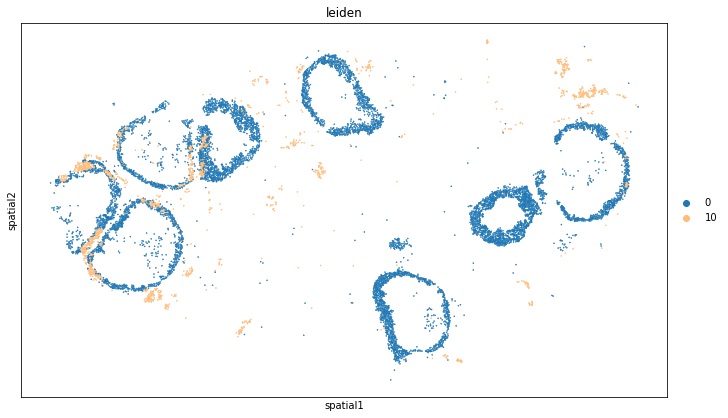

In [22]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['0','10'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

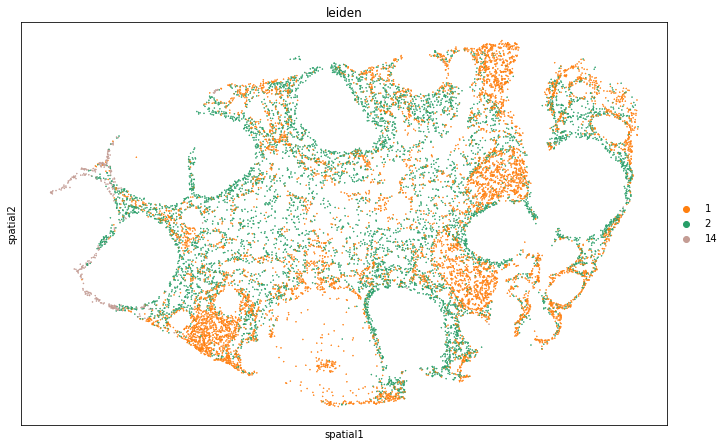

In [45]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['2','1','14'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

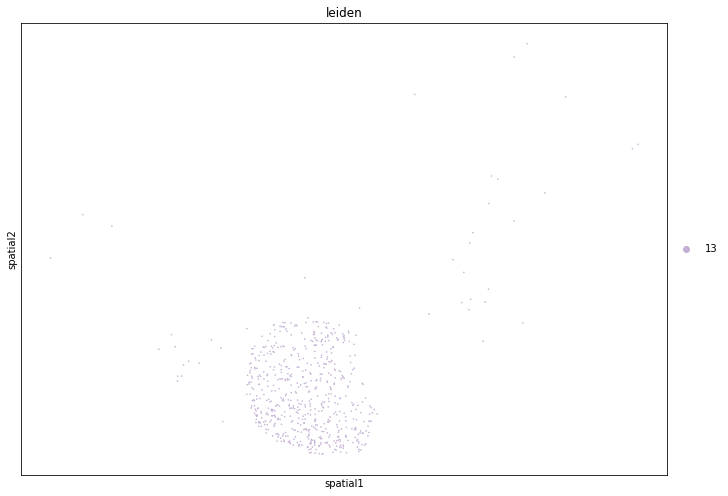

In [34]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="leiden",
    groups = ['13'],
    size=0.5,
    library_id='spatial',
    figsize=(10, 10),
    cmap = 'tab20b',
)

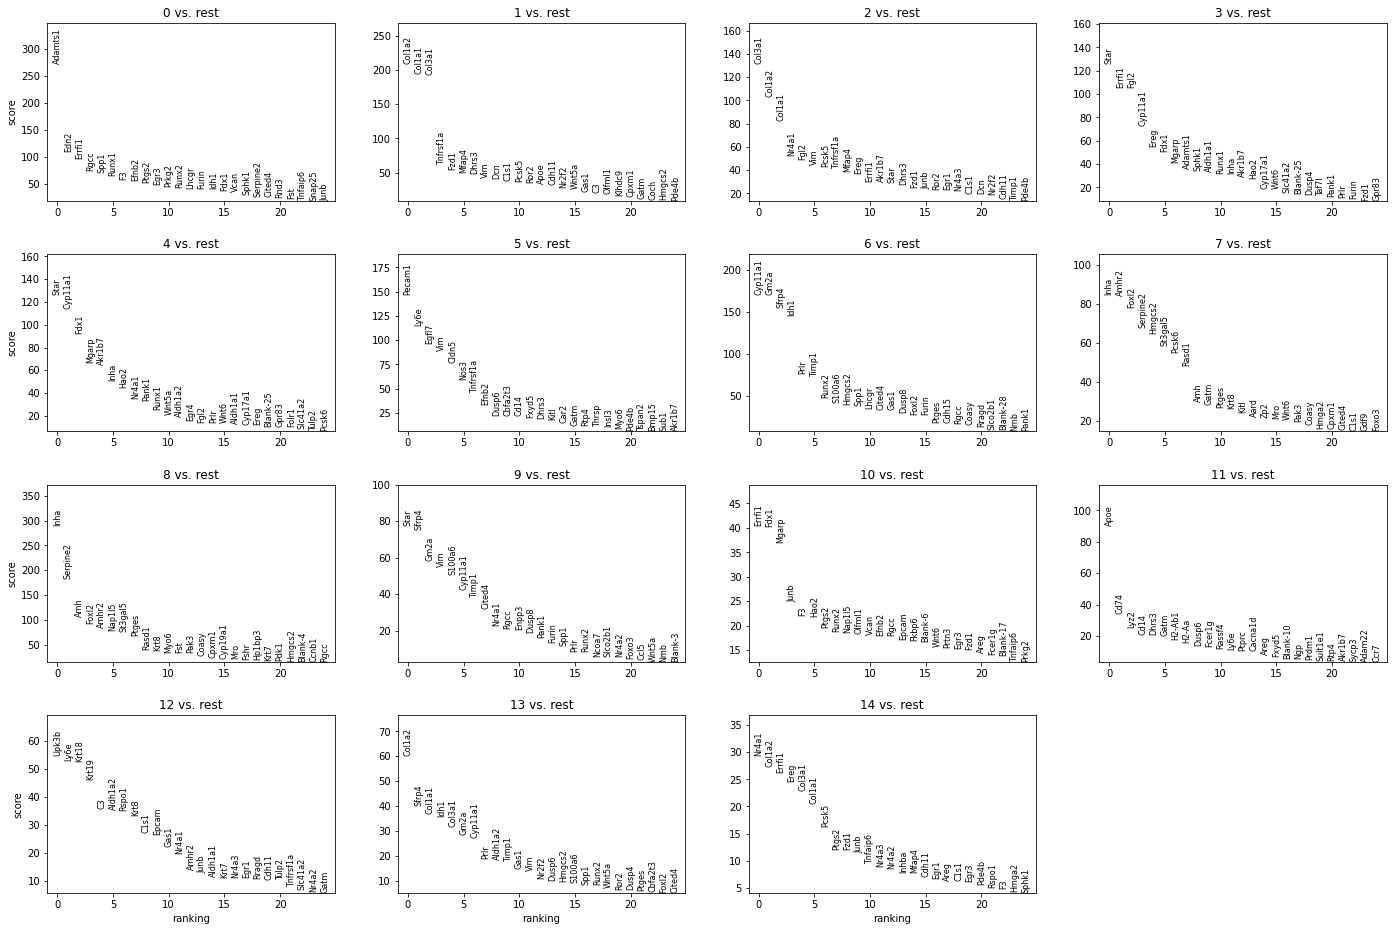

In [23]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test', key_added = "t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key = "t-test")

0


In [42]:
def get_new_value(leiden_value):
    if leiden_value in ['Leiden-1', 'Leiden-2','Leiden-14']:
        return 'stroma'
    if leiden_value in ['Leiden-3','Leiden-4','Leiden-10']:
        return 'theca'
    elif leiden_value in ['Leiden-6','Leiden-9','Leiden-13']:
        return 'luteal'
    elif leiden_value in ['Leiden-12']:
        return 'epithelial'
    elif leiden_value in ['Leiden-7', 'Leiden-8']:
        return 'granulosa'
    elif leiden_value in ['Leiden-11']:
        return 'immune'
    elif leiden_value in ['Leiden-5']:
        return 'endothelial'
    elif leiden_value in ['Leiden-0']:
        return 'luteinizing mural'
    else:
        return 'unknown1'

# apply the function to each row of the 'Leiden' column using the apply() method
meta_leiden['Cell_Type'] = meta_leiden['leiden'].apply(lambda x: get_new_value(x))

print(meta_leiden)

           cell counts     leiden          Cell_Type
Leiden-0          7991   Leiden-0  luteinizing mural
Leiden-1          7566   Leiden-1             stroma
Leiden-2          6682   Leiden-2             stroma
Leiden-3          5292   Leiden-3              theca
Leiden-4          4674   Leiden-4              theca
Leiden-5          4263   Leiden-5        endothelial
Leiden-6          3823   Leiden-6             luteal
Leiden-7          3031   Leiden-7          granulosa
Leiden-8          2962   Leiden-8          granulosa
Leiden-9          2413   Leiden-9             luteal
Leiden-10         1506  Leiden-10              theca
Leiden-11         1173  Leiden-11             immune
Leiden-12          639  Leiden-12         epithelial
Leiden-13          632  Leiden-13             luteal
Leiden-14          348  Leiden-14             stroma


In [43]:
meta_leiden['name'] = meta_leiden.apply(lambda x: x['Cell_Type'] + '_' + x['leiden'] , axis=1)
leiden_names = meta_leiden['name'].values.tolist()
meta_leiden.index = leiden_names


# transfer cell type labels to single cells
leiden_to_cell_type = deepcopy(meta_leiden)
leiden_to_cell_type.set_index('leiden', inplace=True)
leiden_to_cell_type.index.name = None

adata.obs['Cell_Type'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'Cell_Type'])
adata.obs['Cluster'] = adata.obs['leiden'].apply(lambda x: leiden_to_cell_type.loc['Leiden-' + str(x), 'name'])

In [20]:
adata.obs

fov      volume         min_x  \
142239694008826425870598529961971733060  598   33.849053   8391.792554   
156496055044123368112581532430428700130  598   33.211582   8418.681233   
170147117900539217990504369575563685609  598   75.264430   8375.346551   
245018205818407725393608124847300514411  598   20.423595   8388.941972   
248766121147733953446397701086224357294  598  106.029773   8380.389854   
...                                      ...         ...           ...   
29262040266309565977330069786517739433   383  115.028055  10260.441275   
42989839927821851744966915443932768944   383  674.836234  10292.193880   
58946784743266084206672030774357118710   383   41.078609  10279.009466   
66033117609143321899003727465638023282   383  288.270022  10282.909404   
76024018905289447585697993269427778791   383  118.262277  10280.550335   

                                                max_x        min_y  \
142239694008826425870598529961971733060   8398.505445  9992.516936   
156496055044123368112581532430428700130   8421.073331  9996.895603   
170147117900539217990504369575563685609   8383.497243  9989.716871   
245018205818407725393608124847300514411   8393.056353  9985.749050   
248766121147733953446397701086224357294   8389.711445  9985.624607   
...                                               ...          ...   
29262040266309565977330069786517739433   10275.096397  7910.240459   
42989839927821851744966915443932768944   10309.611771  7890.414640   
58946784743266084206672030774357118710   10287.091047  7913.014415   
66033117609143321899003727465638023282   10292.382052  7896.194662   
76024018905289447585697993269427778791   10297.537795  7911.148324   

                                                max_y  ExpressionCounts  \
142239694008826425870598529961971733060   9997.456147              13.0   
156496055044123368112581532430428700130  10002.509263              19.0   
170147117900539217990504369575563685609   9997.827741              17.0   
245018205818407725393608124847300514411   9988.359679              12.0   
248766121147733953446397701086224357294   9991.380904              33.0   
...                                               ...               ...   
29262040266309565977330069786517739433    7915.942086              18.0   
42989839927821851744966915443932768944    7905.618427             339.0   
58946784743266084206672030774357118710    7916.160858              11.0   
66033117609143321899003727465638023282    7904.287084             129.0   
76024018905289447585697993269427778791    7915.738700              26.0   

                                         n_counts leiden   Cell_Type  \
142239694008826425870598529961971733060      13.0      9      luteal   
156496055044123368112581532430428700130      19.0      6      luteal   
170147117900539217990504369575563685609      17.0     12  epithelial   
245018205818407725393608124847300514411      12.0      6      luteal   
248766121147733953446397701086224357294      33.0      9      luteal   
...                                           ...    ...         ...   
29262040266309565977330069786517739433       18.0     12  epithelial   
42989839927821851744966915443932768944      339.0      2      stroma   
58946784743266084206672030774357118710       11.0      0      luteal   
66033117609143321899003727465638023282      129.0      1      stroma   
76024018905289447585697993269427778791       26.0     12  epithelial   

                                                      Cluster  
142239694008826425870598529961971733060       luteal_Leiden-9  
156496055044123368112581532430428700130       luteal_Leiden-6  
170147117900539217990504369575563685609  epithelial_Leiden-12  
245018205818407725393608124847300514411       luteal_Leiden-6  
248766121147733953446397701086224357294       luteal_Leiden-9  
...                                                       ...  
29262040266309565977330069786517739433   epithelial_Leiden-12  
429898399278218517449669154439327

In [ ]:
adata.write("/home/jupyter/region1_0824.h5ad")

In [ ]:
adata.read('region1_0824.h5ad')

In [48]:
set(adata.obs['Cluster'])

{'endothelial_Leiden-5',
 'epithelial_Leiden-12',
 'granulosa_Leiden-7',
 'granulosa_Leiden-8',
 'immune_Leiden-11',
 'luteal_Leiden-0',
 'luteal_Leiden-10',
 'luteal_Leiden-13',
 'luteal_Leiden-6',
 'luteal_Leiden-9',
 'mesenchymal_Leiden-1',
 'mesenchymal_Leiden-14',
 'mesenchymal_Leiden-2',
 'mesenchymal_Leiden-3',
 'mesenchymal_Leiden-4'}

In [38]:
palette = ["#e00089",
"#9e2409",
"#ff7d3e",
'#b151d8',
'#f2b1ed',
           "#92b3ff",
'#006ec9',
'#f9b69f']
adata.uns['Cell_Type_colors'] = palette

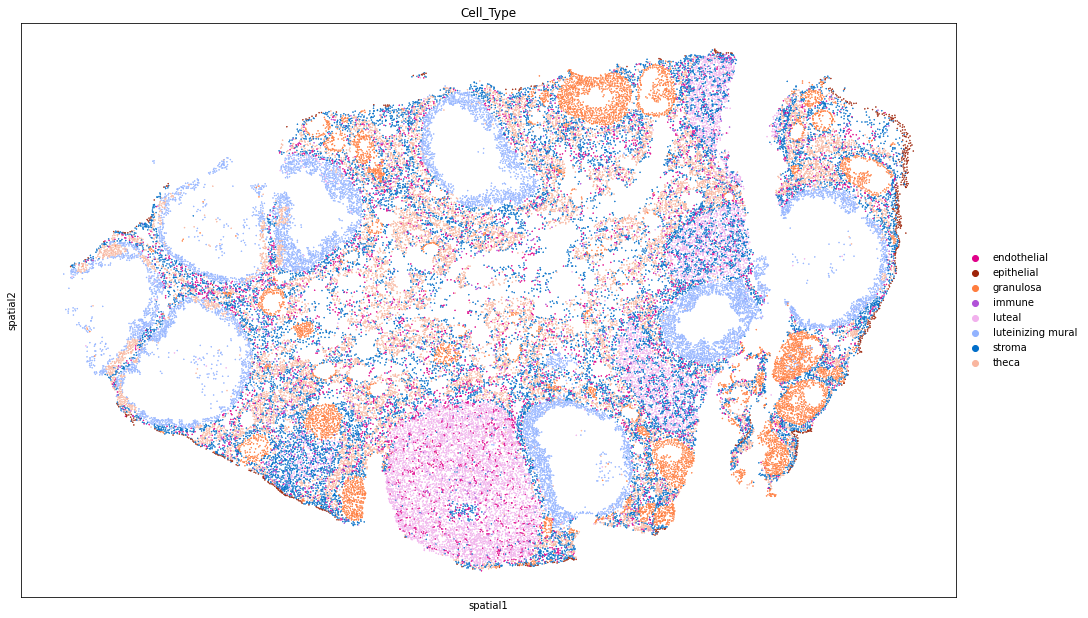

In [44]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cell_Type",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

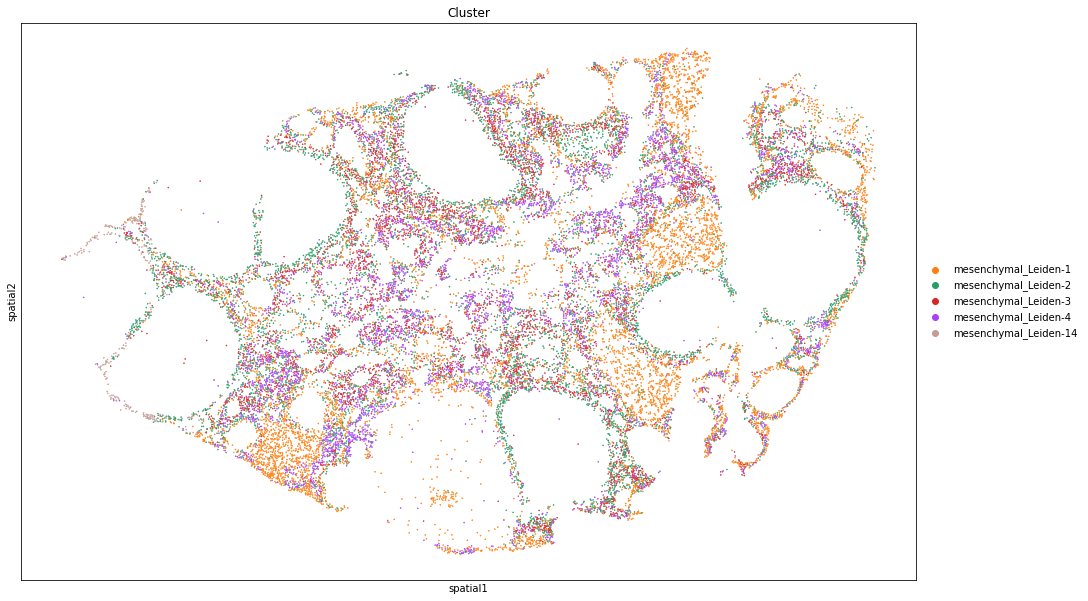

In [50]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['mesenchymal_Leiden-1',
 'mesenchymal_Leiden-14',
 'mesenchymal_Leiden-2',
 'mesenchymal_Leiden-3',
 'mesenchymal_Leiden-4'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

In [21]:
palette = ["#e00089",
"#9e2409",
"#ff7d3e",
'#b151d8',
'#f2b1ed',
'#006ec9',
'#f9b69f']

In [22]:
adata.uns['Cell_Type_colors'] = palette

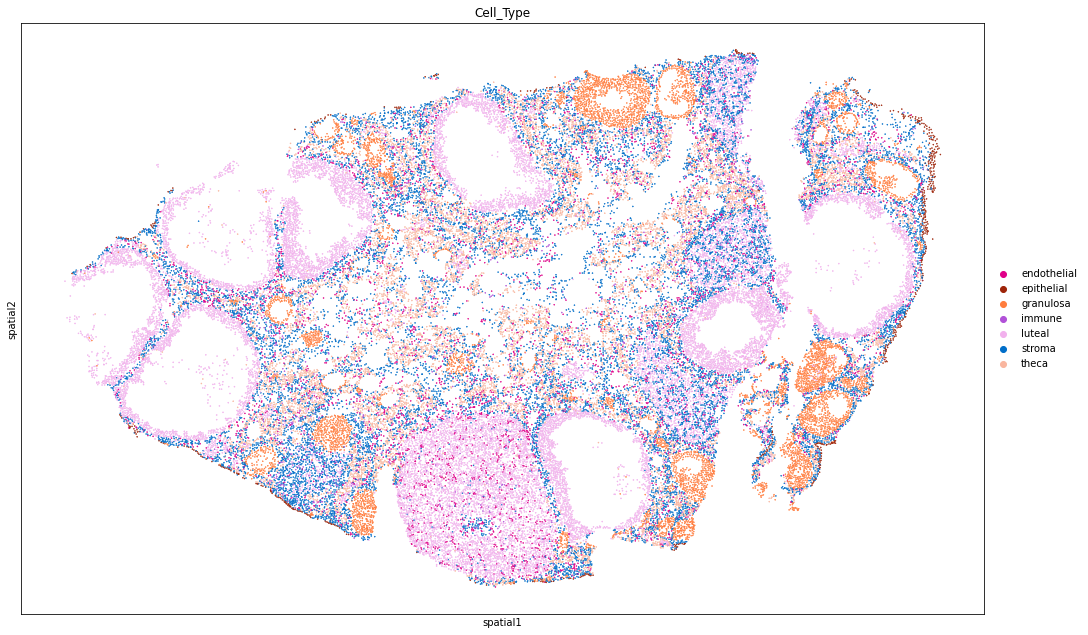

In [23]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cell_Type",
    size=0.5,
    library_id='spatial',
    figsize=(15, 15)
)


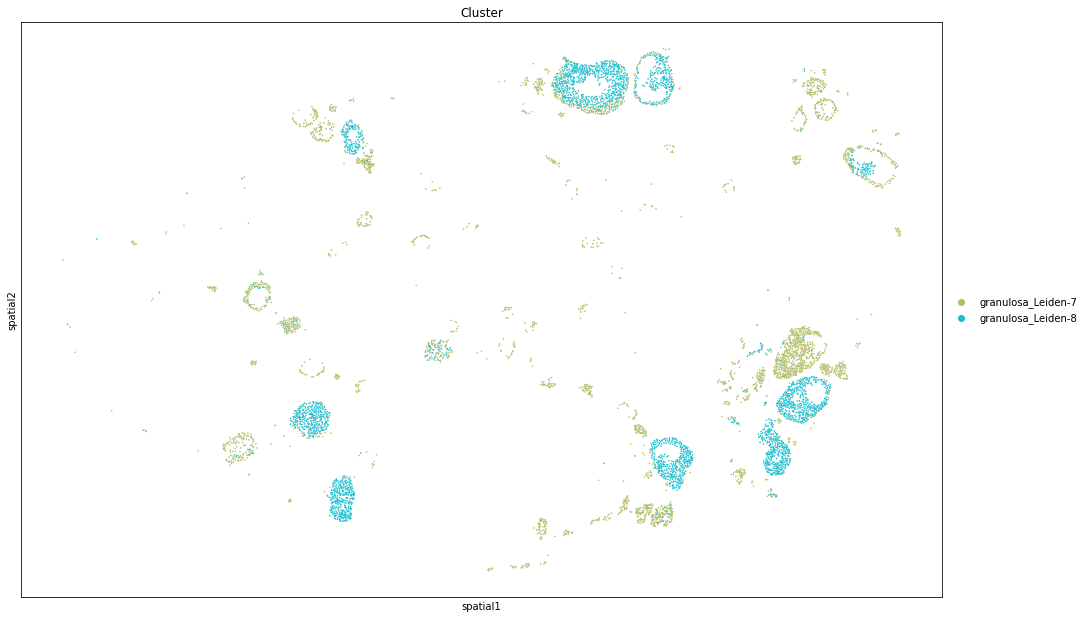

In [58]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Cluster",
    groups = ['granulosa_Leiden-7',
 'granulosa_Leiden-8'],
    size=0.5,
    library_id='spatial',
    figsize=(15, 15),
    cmap = 'tab20b',
)

  0%|          | 0/1000 [00:00<?, ?/s]

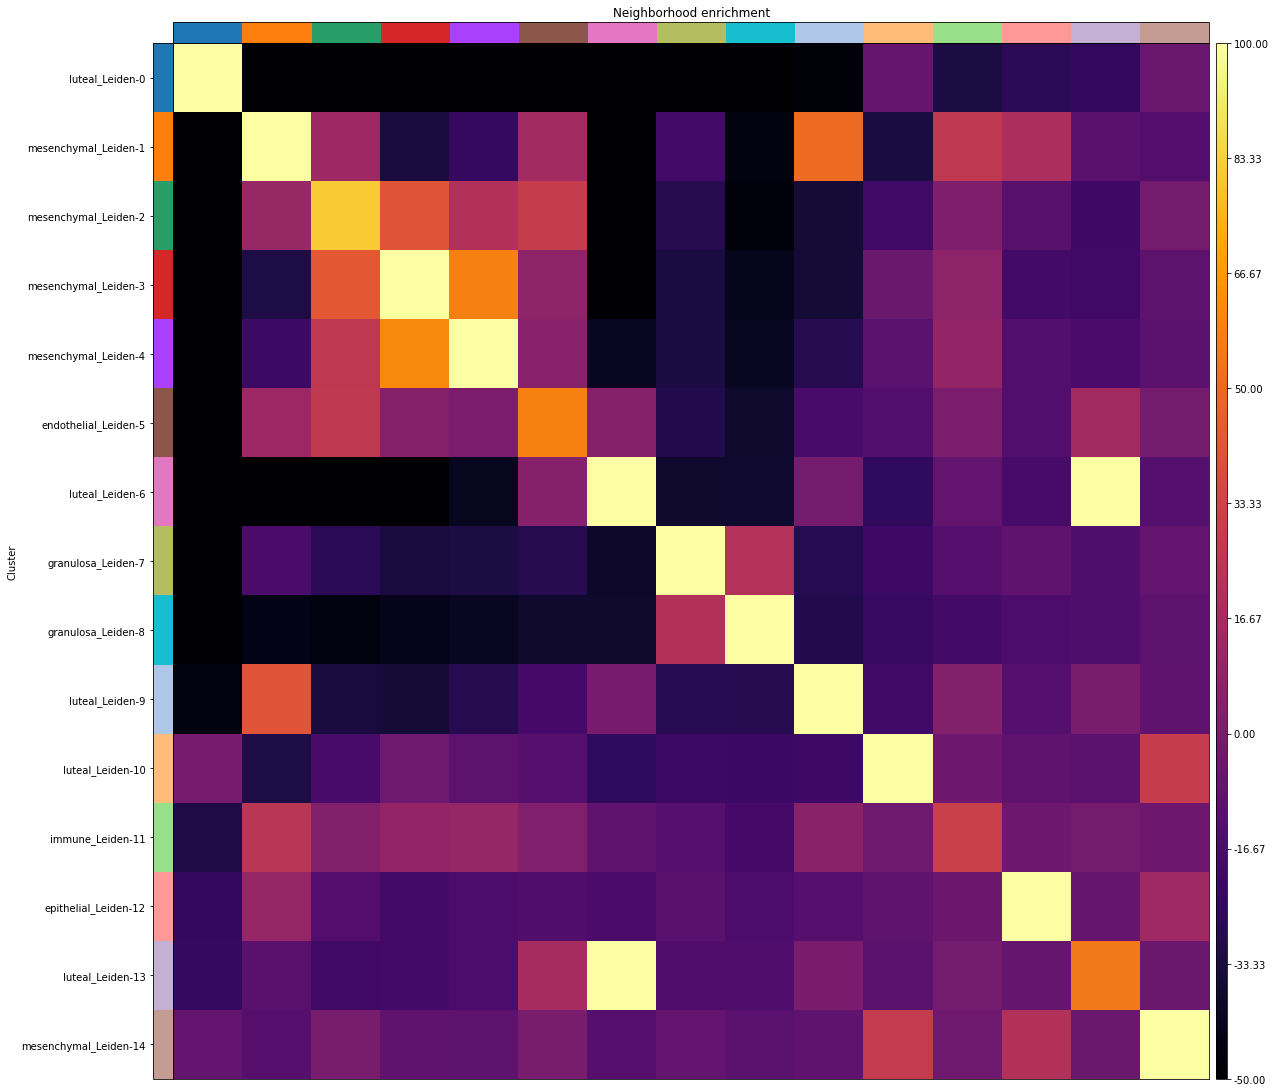

In [60]:
sq.gr.spatial_neighbors(adata, coord_type="generic", spatial_key="spatial")
sq.gr.nhood_enrichment(adata, cluster_key="Cluster")
sq.pl.nhood_enrichment(adata, cluster_key="Cluster", cmap="inferno", vmin=-50, vmax=100, figsize=(15,15))

In [61]:
sq.gr.spatial_autocorr(adata, mode="moran")
num_view = 12
top_autocorr = adata.uns['moranI']['I'].sort_values(ascending=False).head(num_view).index.tolist()
bot_autocorr = adata.uns['moranI']['I'].sort_values(ascending=True).head(num_view).index.tolist()

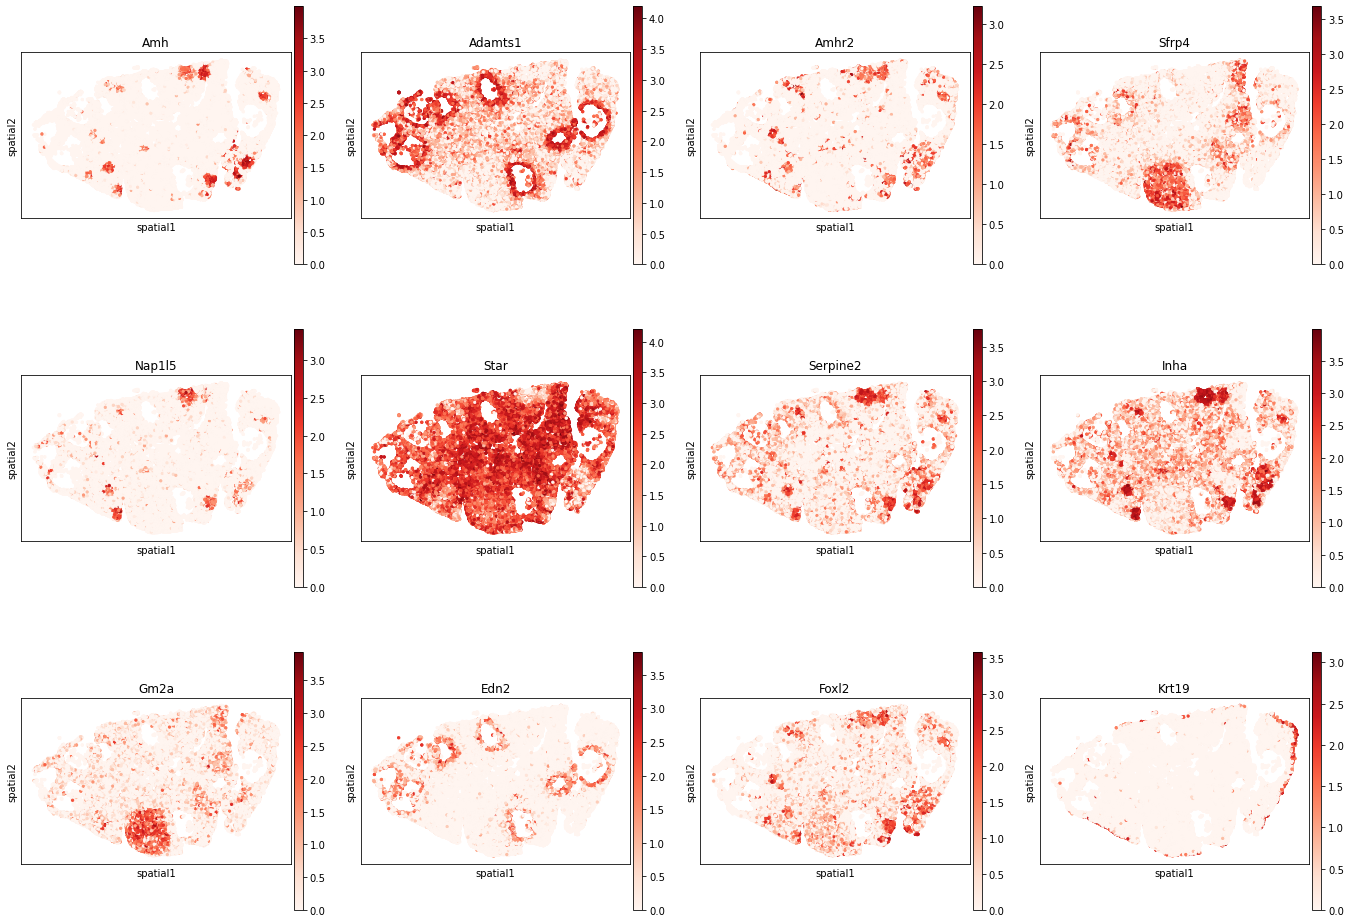

In [62]:
sq.pl.spatial_scatter(
    adata,
    color=top_autocorr,
    size=20,
    cmap='Reds',
    img=False,
    figsize=(5,5),
    shape = None,
    library_id='spatial',
)

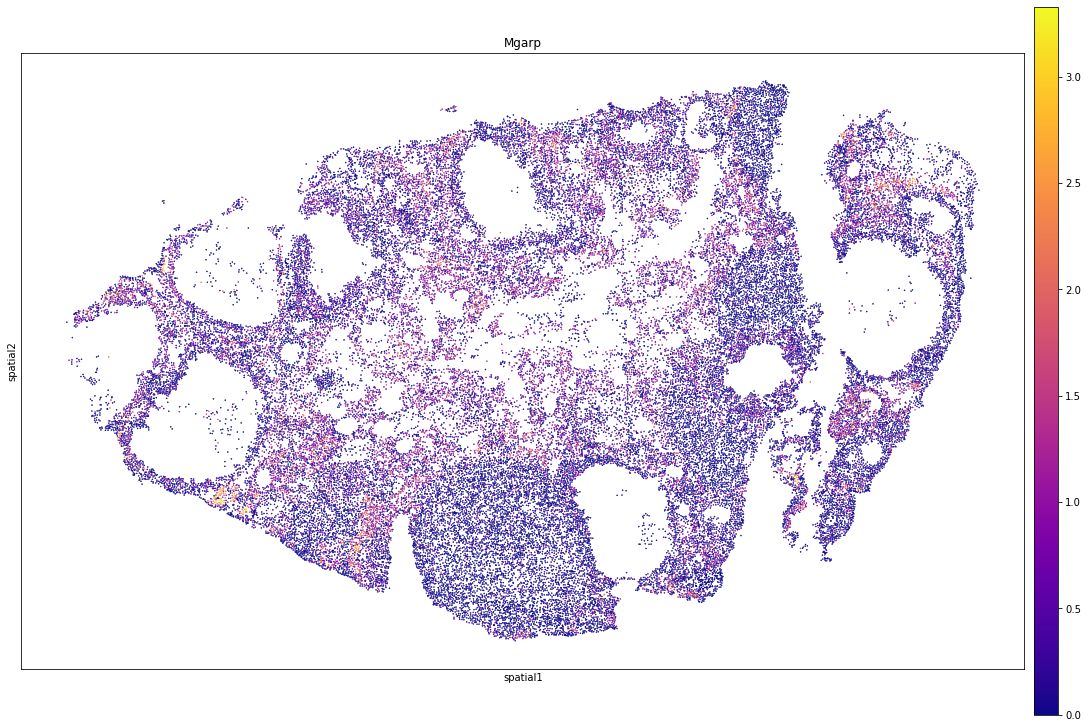

In [33]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Mgarp",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [68]:
sq.gr.centrality_scores(adata, cluster_key="Cluster")

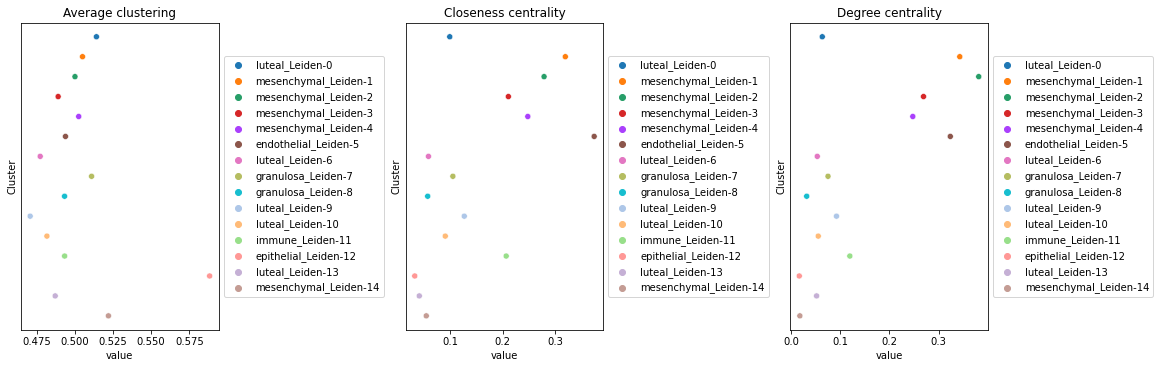

In [69]:
sq.pl.centrality_scores(adata, cluster_key="Cluster", figsize=(16, 5))

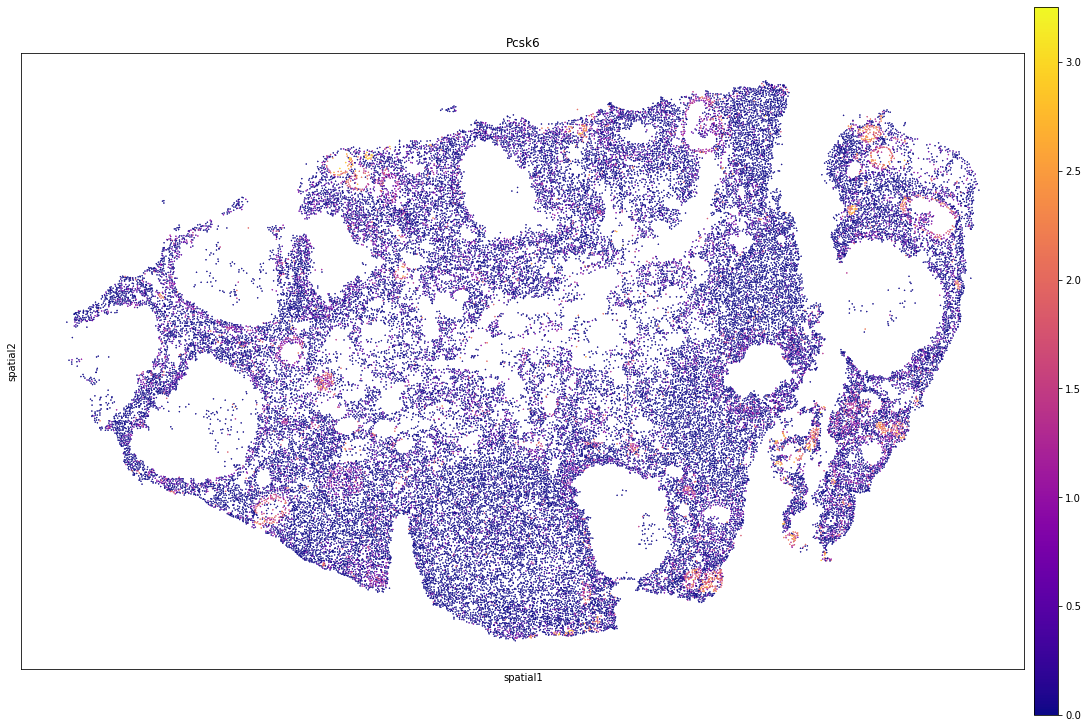

In [20]:
sq.pl.spatial_scatter(
    adata,
    shape=None,
    color="Pcsk6",
    size=0.5,
    library_id='spatial',
    figsize=(15, 10),
    cmap = 'plasma',
)

In [22]:
adata.write('/home/jupyter/region_1/processed_region1.h5ad')